In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Online Retail.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
df.shape

(541909, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df = df.dropna()

In [9]:
df.shape

(406829, 8)

In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
df = df[(df['UnitPrice'] > -2.5) & (df['UnitPrice'] < 7.5)]
df.describe()

,Quantity,UnitPrice,CustomerID
count,370148.000000,370148.000000,370148.000000
mean,12.977258,2.133710,15302.173366
std,260.693084,1.523679,1712.991550
min,-80995.000000,0.000000,12346.000000
25%,2.000000,0.850000,13969.000000
50%,6.000000,1.650000,15184.000000
75%,12.000000,2.950000,16804.000000
max,80995.000000,7.460000,18287.000000


In [12]:
df = df[(df.Quantity > -13) & (df.Quantity < 27)]
df.describe()

,Quantity,UnitPrice,CustomerID
count,343712.000000,343712.000000,343712.000000
mean,7.286964,2.191766,15319.919968
std,6.878460,1.533390,1711.542907
min,-12.000000,0.000000,12347.000000
25%,2.000000,1.250000,13988.000000
50%,5.000000,1.650000,15237.000000
75%,12.000000,2.950000,16814.000000
max,26.000000,7.460000,18287.000000


In [13]:
df['CustomerID'] = df['CustomerID'].astype(str)

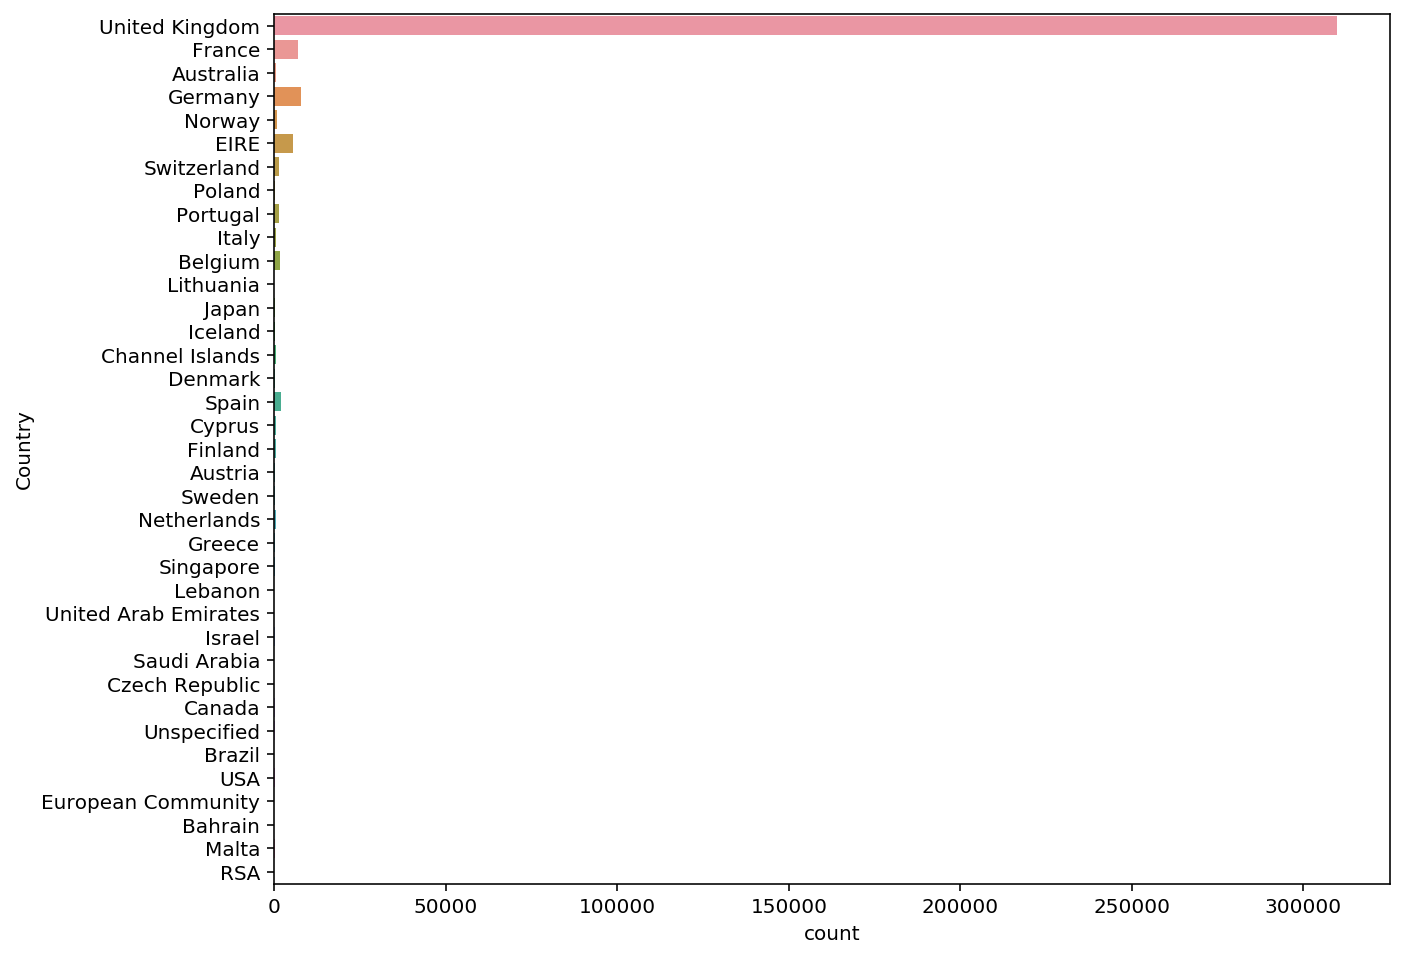

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(y='Country', data=df)

In [15]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Germany', 'Norway',
       'EIRE', 'Switzerland', 'Poland', 'Portugal', 'Italy', 'Belgium',
       'Lithuania', 'Japan', 'Iceland', 'Channel Islands', 'Denmark',
       'Spain', 'Cyprus', 'Finland', 'Austria', 'Sweden', 'Netherlands',
       'Greece', 'Singapore', 'Lebanon', 'United Arab Emirates', 'Israel',
       'Saudi Arabia', 'Czech Republic', 'Canada', 'Unspecified',
       'Brazil', 'USA', 'European Community', 'Bahrain', 'Malta', 'RSA'],
      dtype=object)

In [16]:
df1 = df[df.Country != 'United Kingdom']

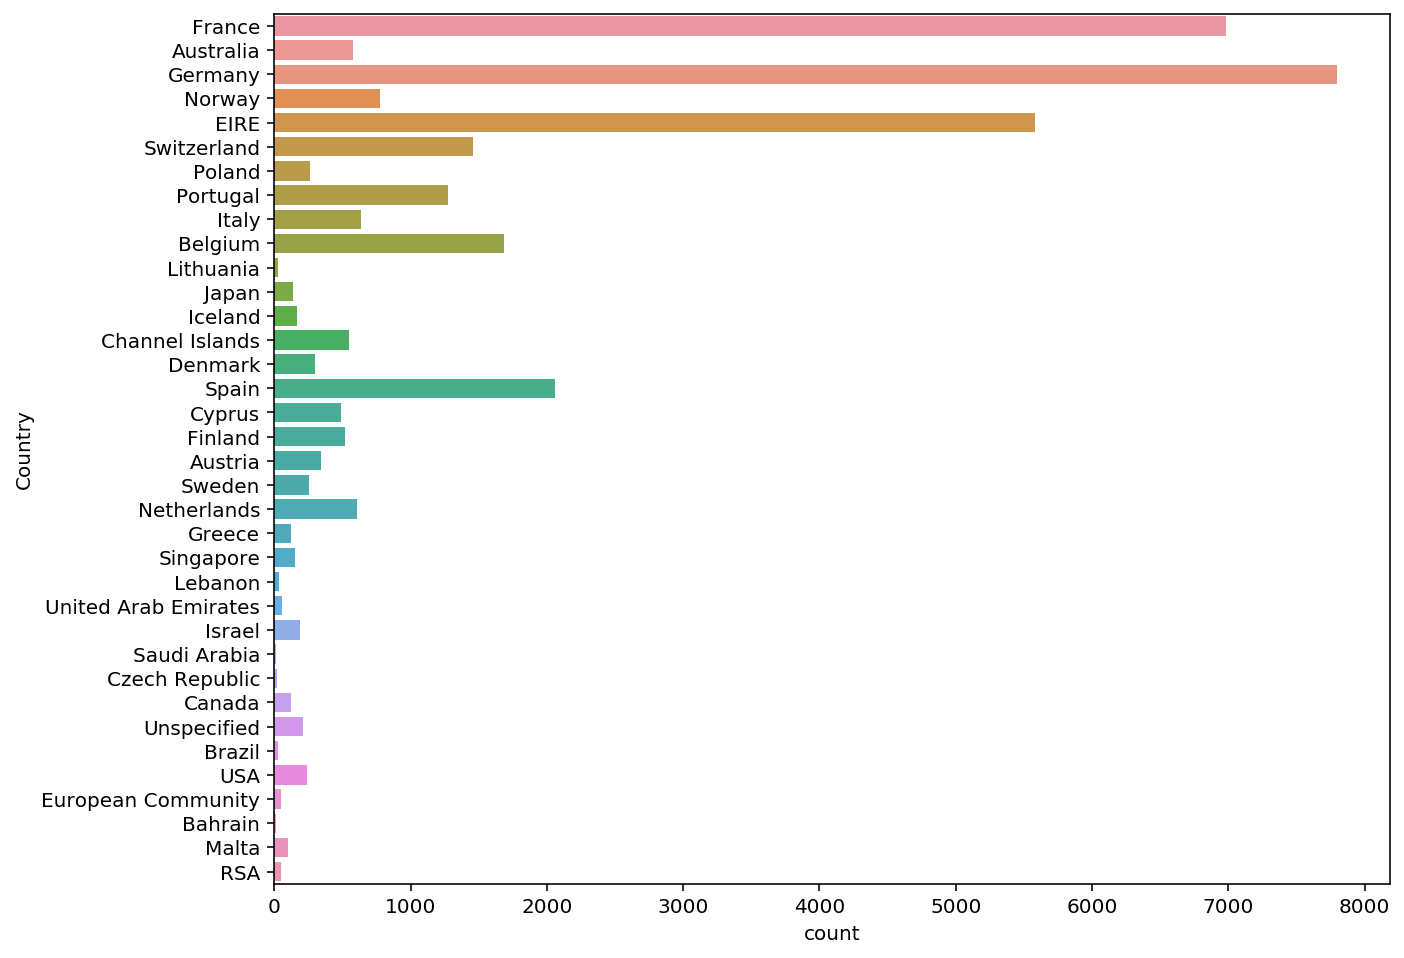

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(y='Country', data=df1)

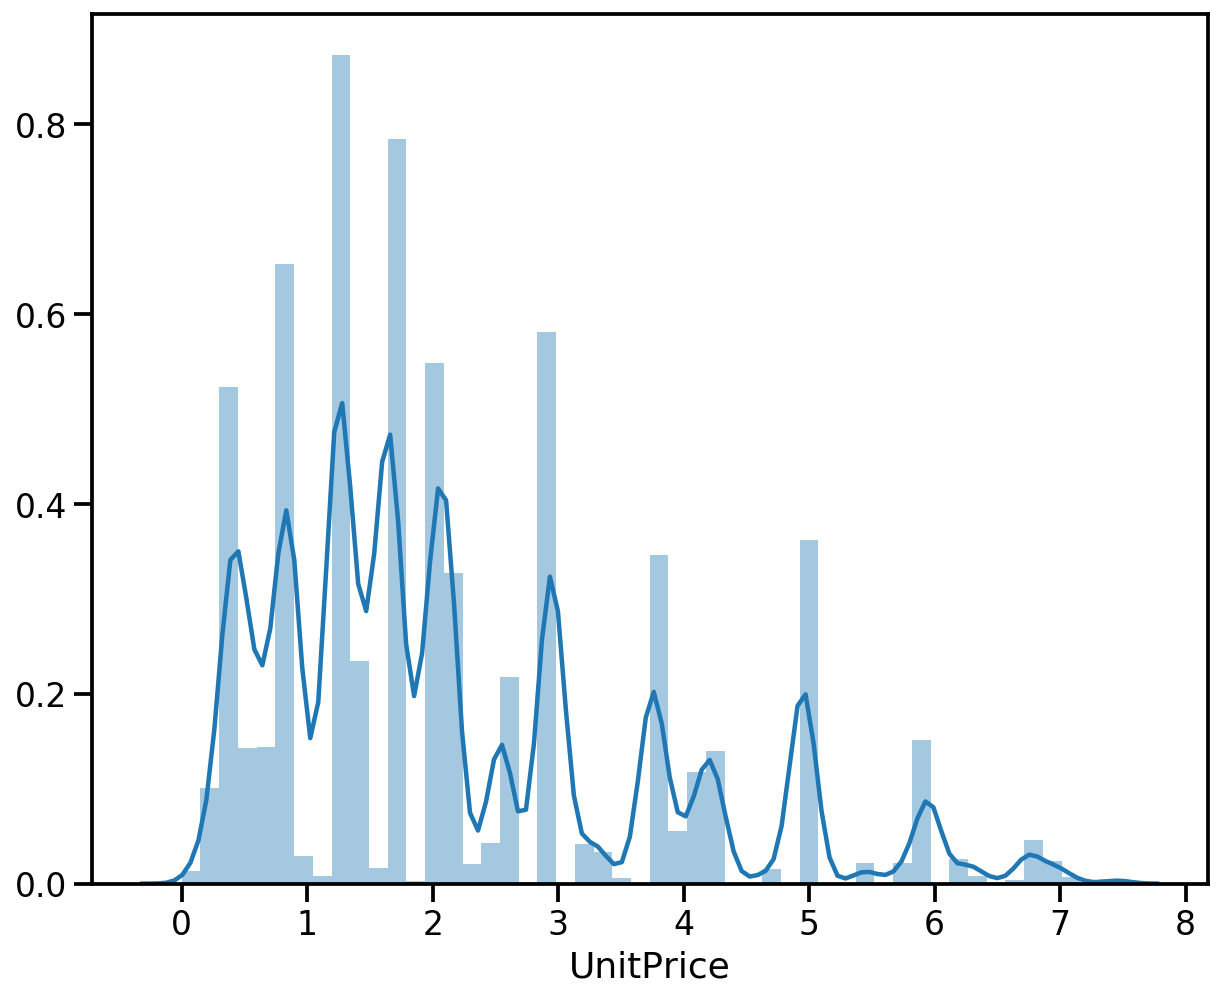

In [18]:
plt.figure(figsize=(10,8))
sns.set_context('talk')
sns.distplot(df['UnitPrice'])

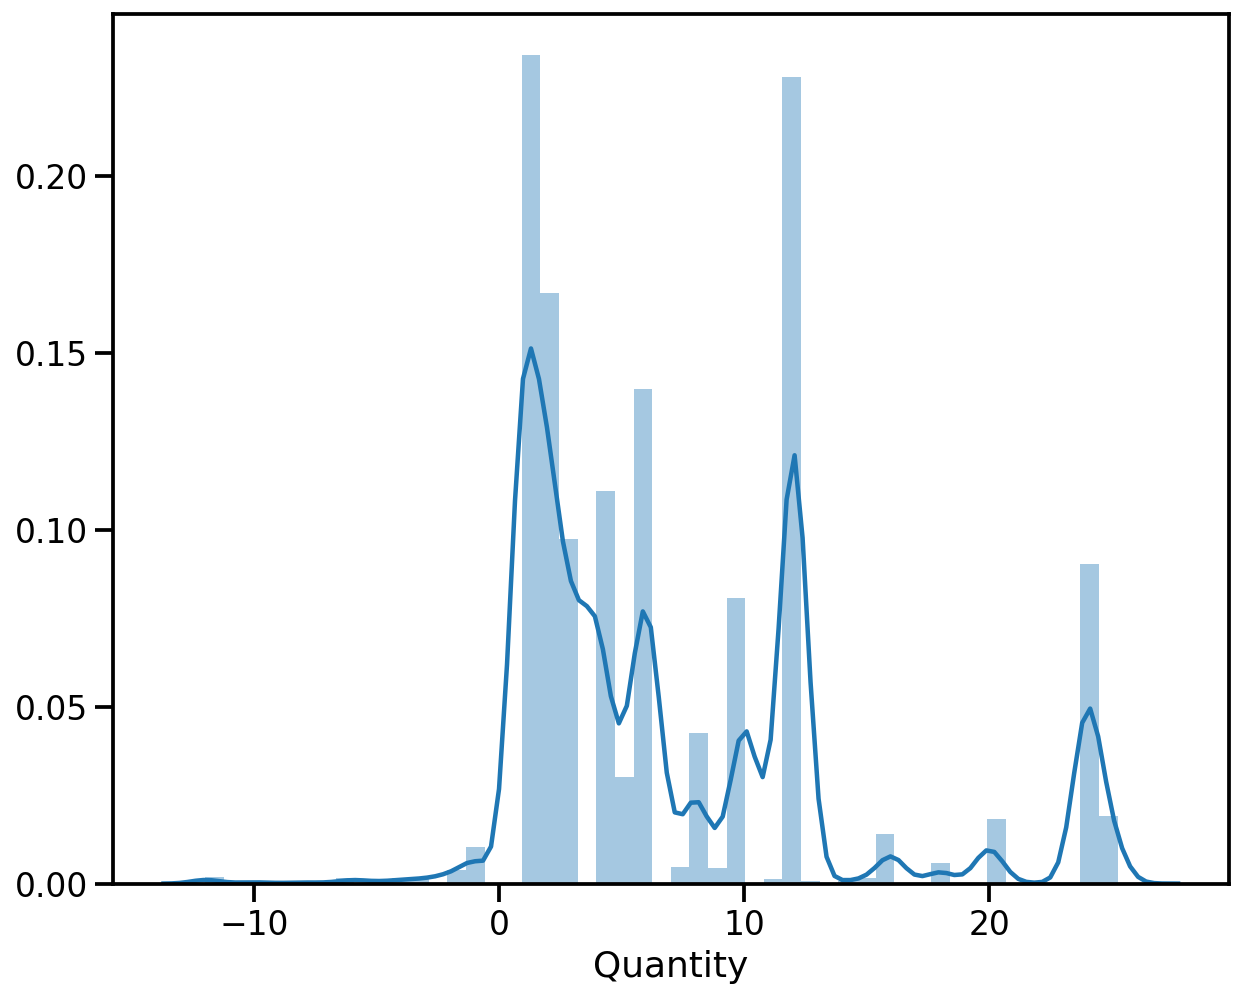

In [19]:
plt.figure(figsize=(10,8))
sns.set_context('talk')
sns.distplot(df['Quantity'])

In [20]:
# calculate customers who spend most money 
df['Total'] = df['Quantity'] * df['UnitPrice']

In [21]:
total_each_customer = df.groupby('CustomerID')['Total'].sum()
total_each_customer = total_each_customer.reset_index()

In [22]:
frequency_customer = df.groupby('CustomerID')['InvoiceNo'].count()
frequency_customer = frequency_customer.reset_index()
frequency_customer.columns = ['CustomerID','Frequency']

In [48]:
#merge the two tables
customer = pd.merge(total_each_customer, frequency_customer, on='CustomerID', how='inner')
customer.head(10)
customer_m = customer[['Total','Frequency']]
customer_m.head(10)

,Total,Frequency
0,3314.73,166
1,90.20,6
2,984.15,57
3,294.40,16
4,1010.61,73
5,29.30,2
6,682.69,40
7,219.00,9
8,1086.56,33
9,3195.41,95


Text(0.5, 1.03, 'Average amount customer spending each country')

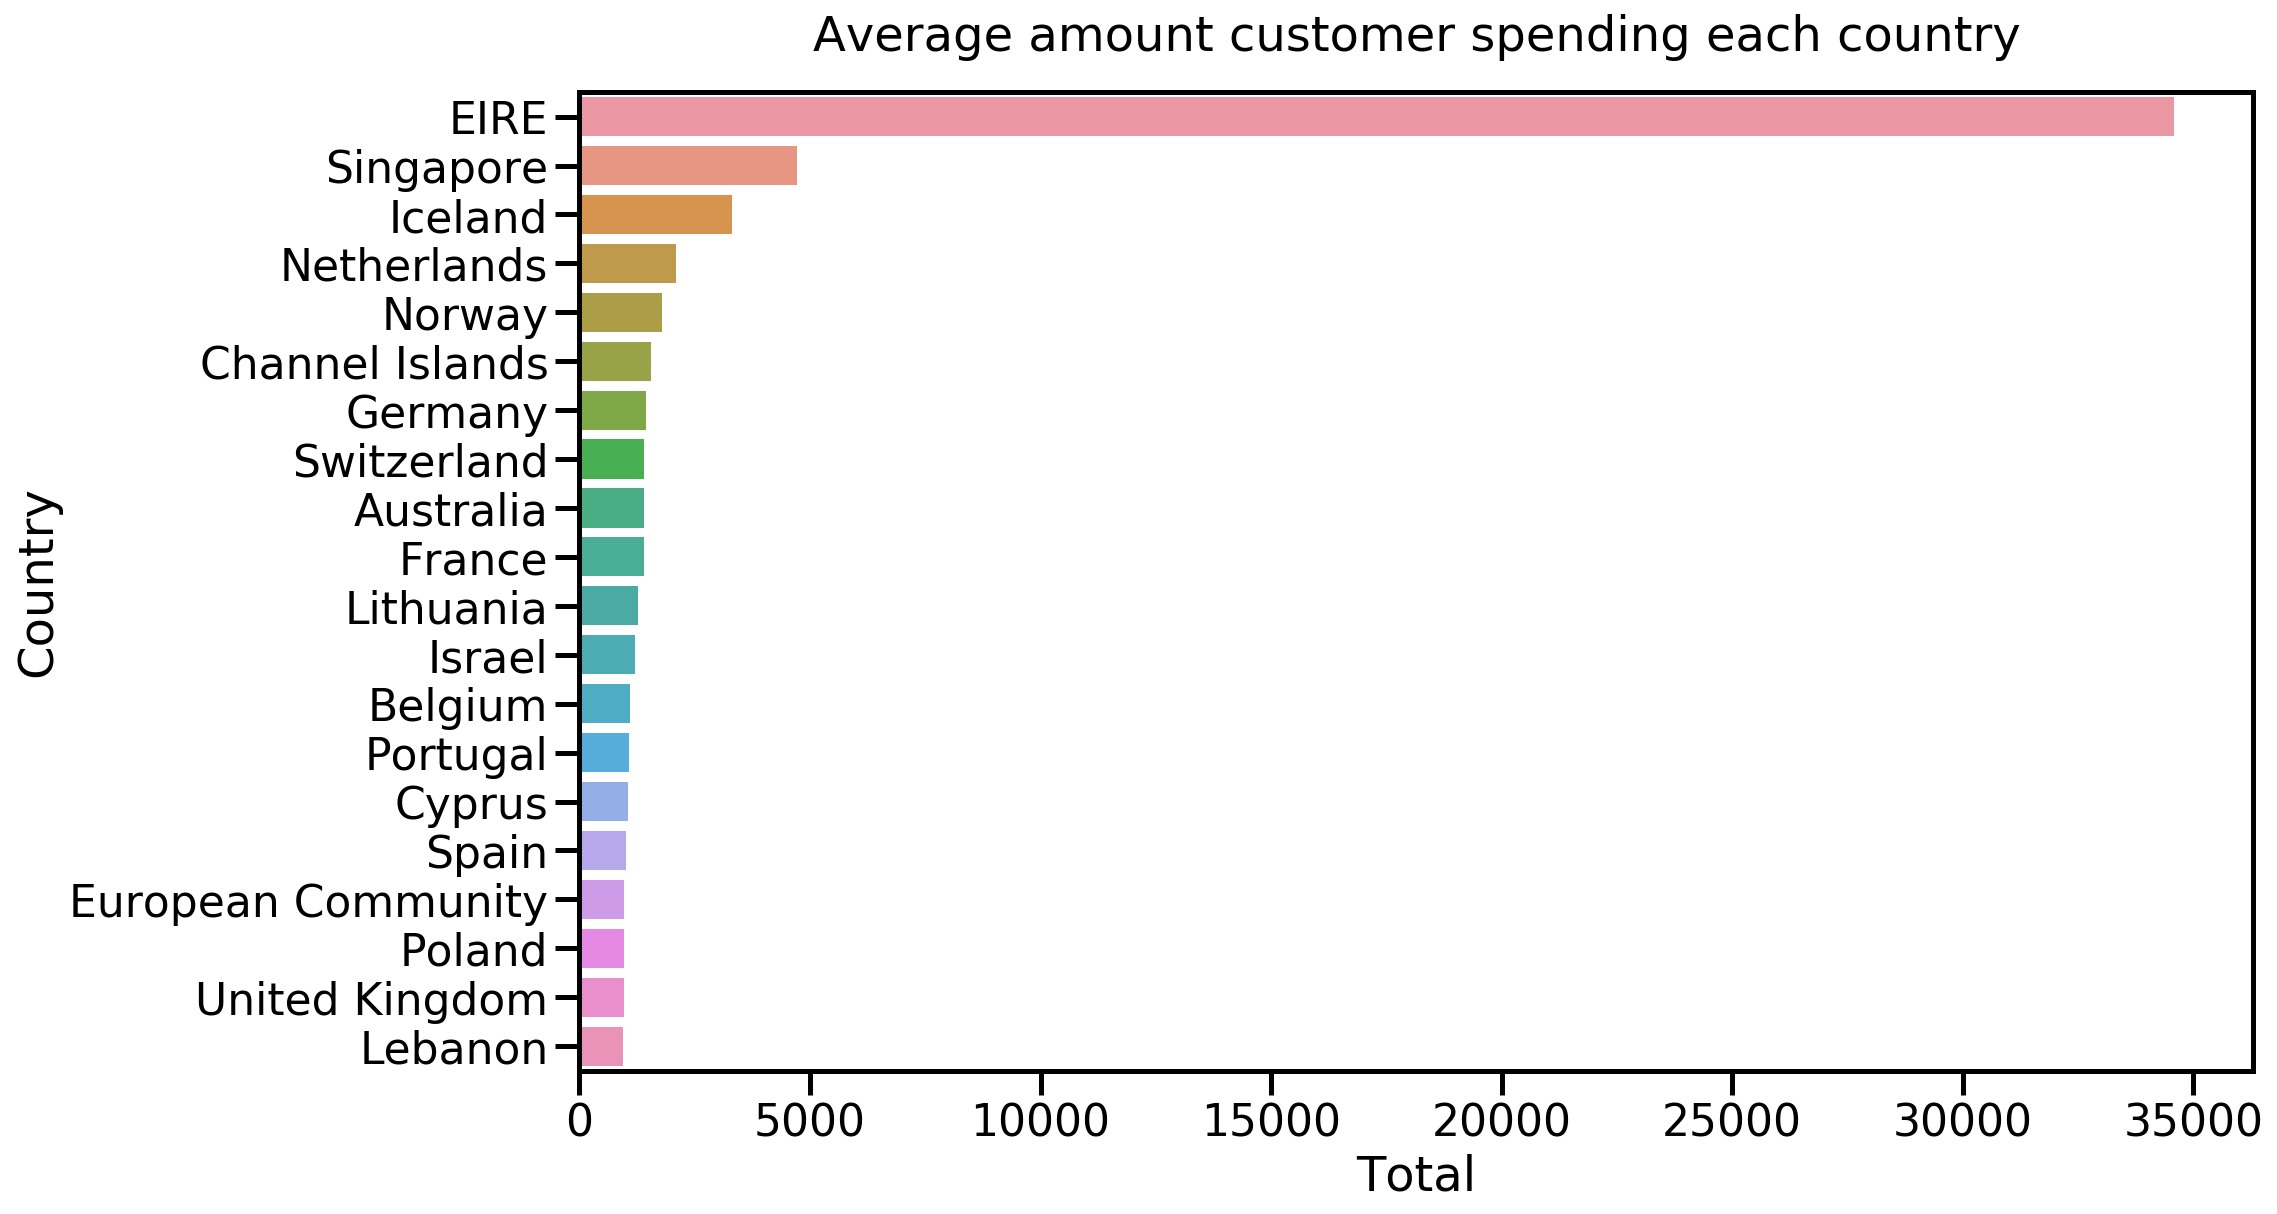

In [24]:
df_country = df.groupby(['Country','CustomerID']).sum()
df_country = df_country.groupby('Country').mean()['Total']
df_country = pd.DataFrame(df_country)
df_country = df_country.reset_index()
df_plot1 = df_country.sort_values('Total', ascending=False).head(20)

plt.figure(figsize=(15,9))
sns.set_context('poster')
sns.barplot(y='Country', x='Total', data=df_plot1)
plt.title('Average amount customer spending each country', y=1.03)


Text(0.5, 1.03, 'total amount each customer spent ')

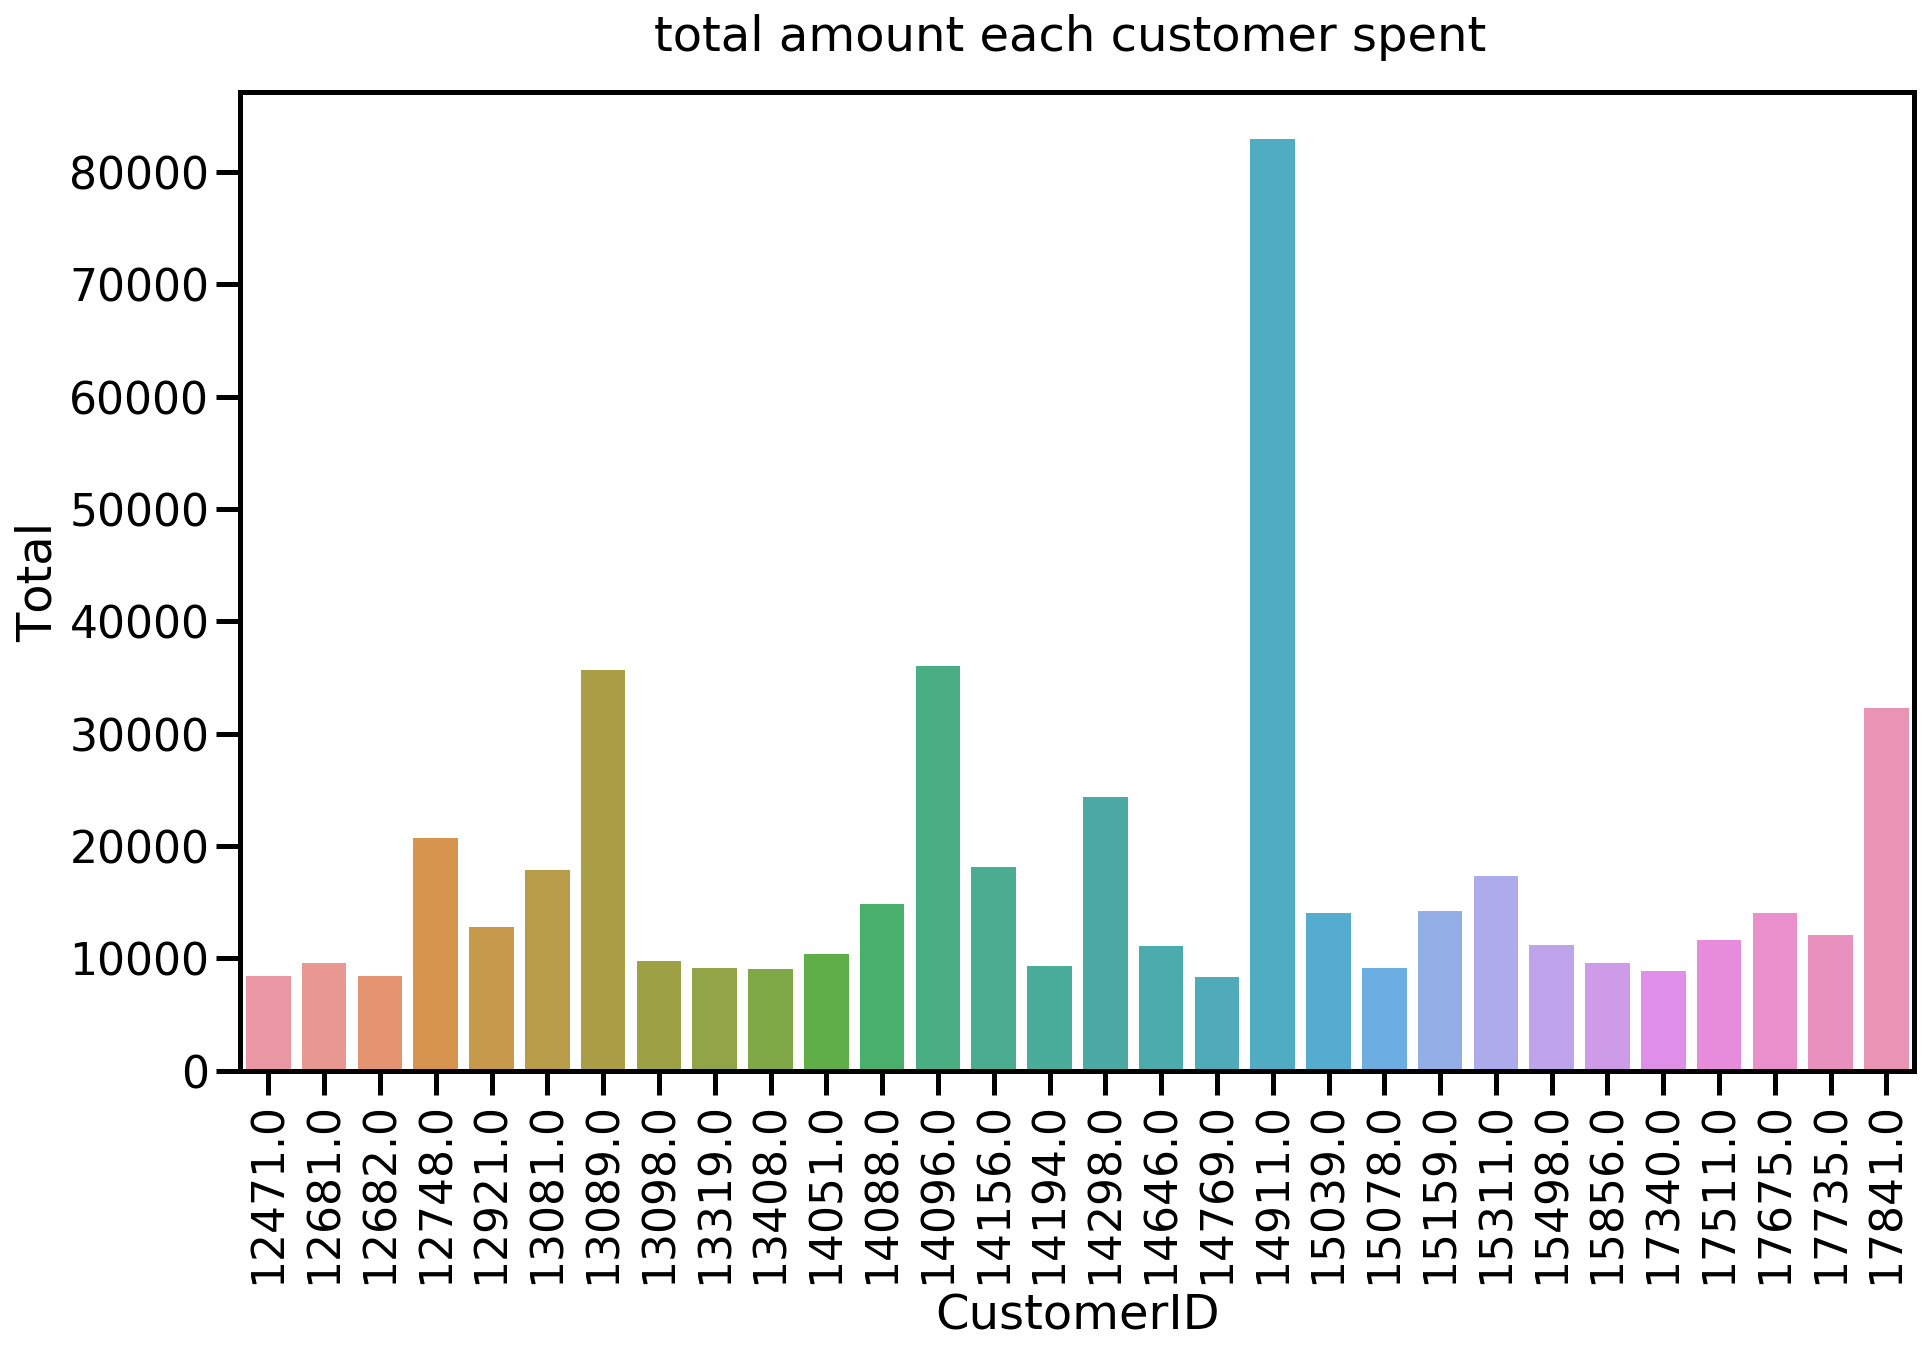

In [25]:
plt.figure(figsize=(15,9))
df_plot2 = customer.sort_values('Total', ascending=False).head(30)
df_plot2 = df_plot2.reset_index()
sns.set_context('poster')
sns.barplot(x='CustomerID', y='Total', data=df_plot2)
plt.xticks(rotation=90)
plt.title('total amount each customer spent ', y=1.03)

     CustomerID     Total  Frequency
3910    17841.0  32262.38       7487
1840    14911.0  82950.62       4617
1260    14096.0  36018.24       4416
326     12748.0  20715.46       4235
1623    14606.0   7994.03       2513
2126    15311.0  17331.71       2023
673     13263.0   6723.00       1624
549     13089.0  35693.63       1529
1923    15039.0  14005.72       1287
4101    18118.0   4671.50       1215
1305    14159.0   4468.83       1195
1759    14796.0   7080.25       1116
1896    15005.0   5514.53       1101
2636    16033.0   6825.56       1024
1401    14298.0  24322.40       1009
1234    14056.0   5823.90        996
1740    14769.0   8360.52        978
3001    16549.0   3718.04        951
1512    14456.0   2680.91        940
2414    15719.0   4593.01        898
2298    15555.0   3960.90        888
545     13081.0  17814.19        872
3280    16931.0   4214.75        859
1302    14156.0  18156.76        833
3891    17811.0   5509.77        797
4219    18283.0   2051.98        752
1

Text(0.5, 1.03, 'frequency of customer purchases online')

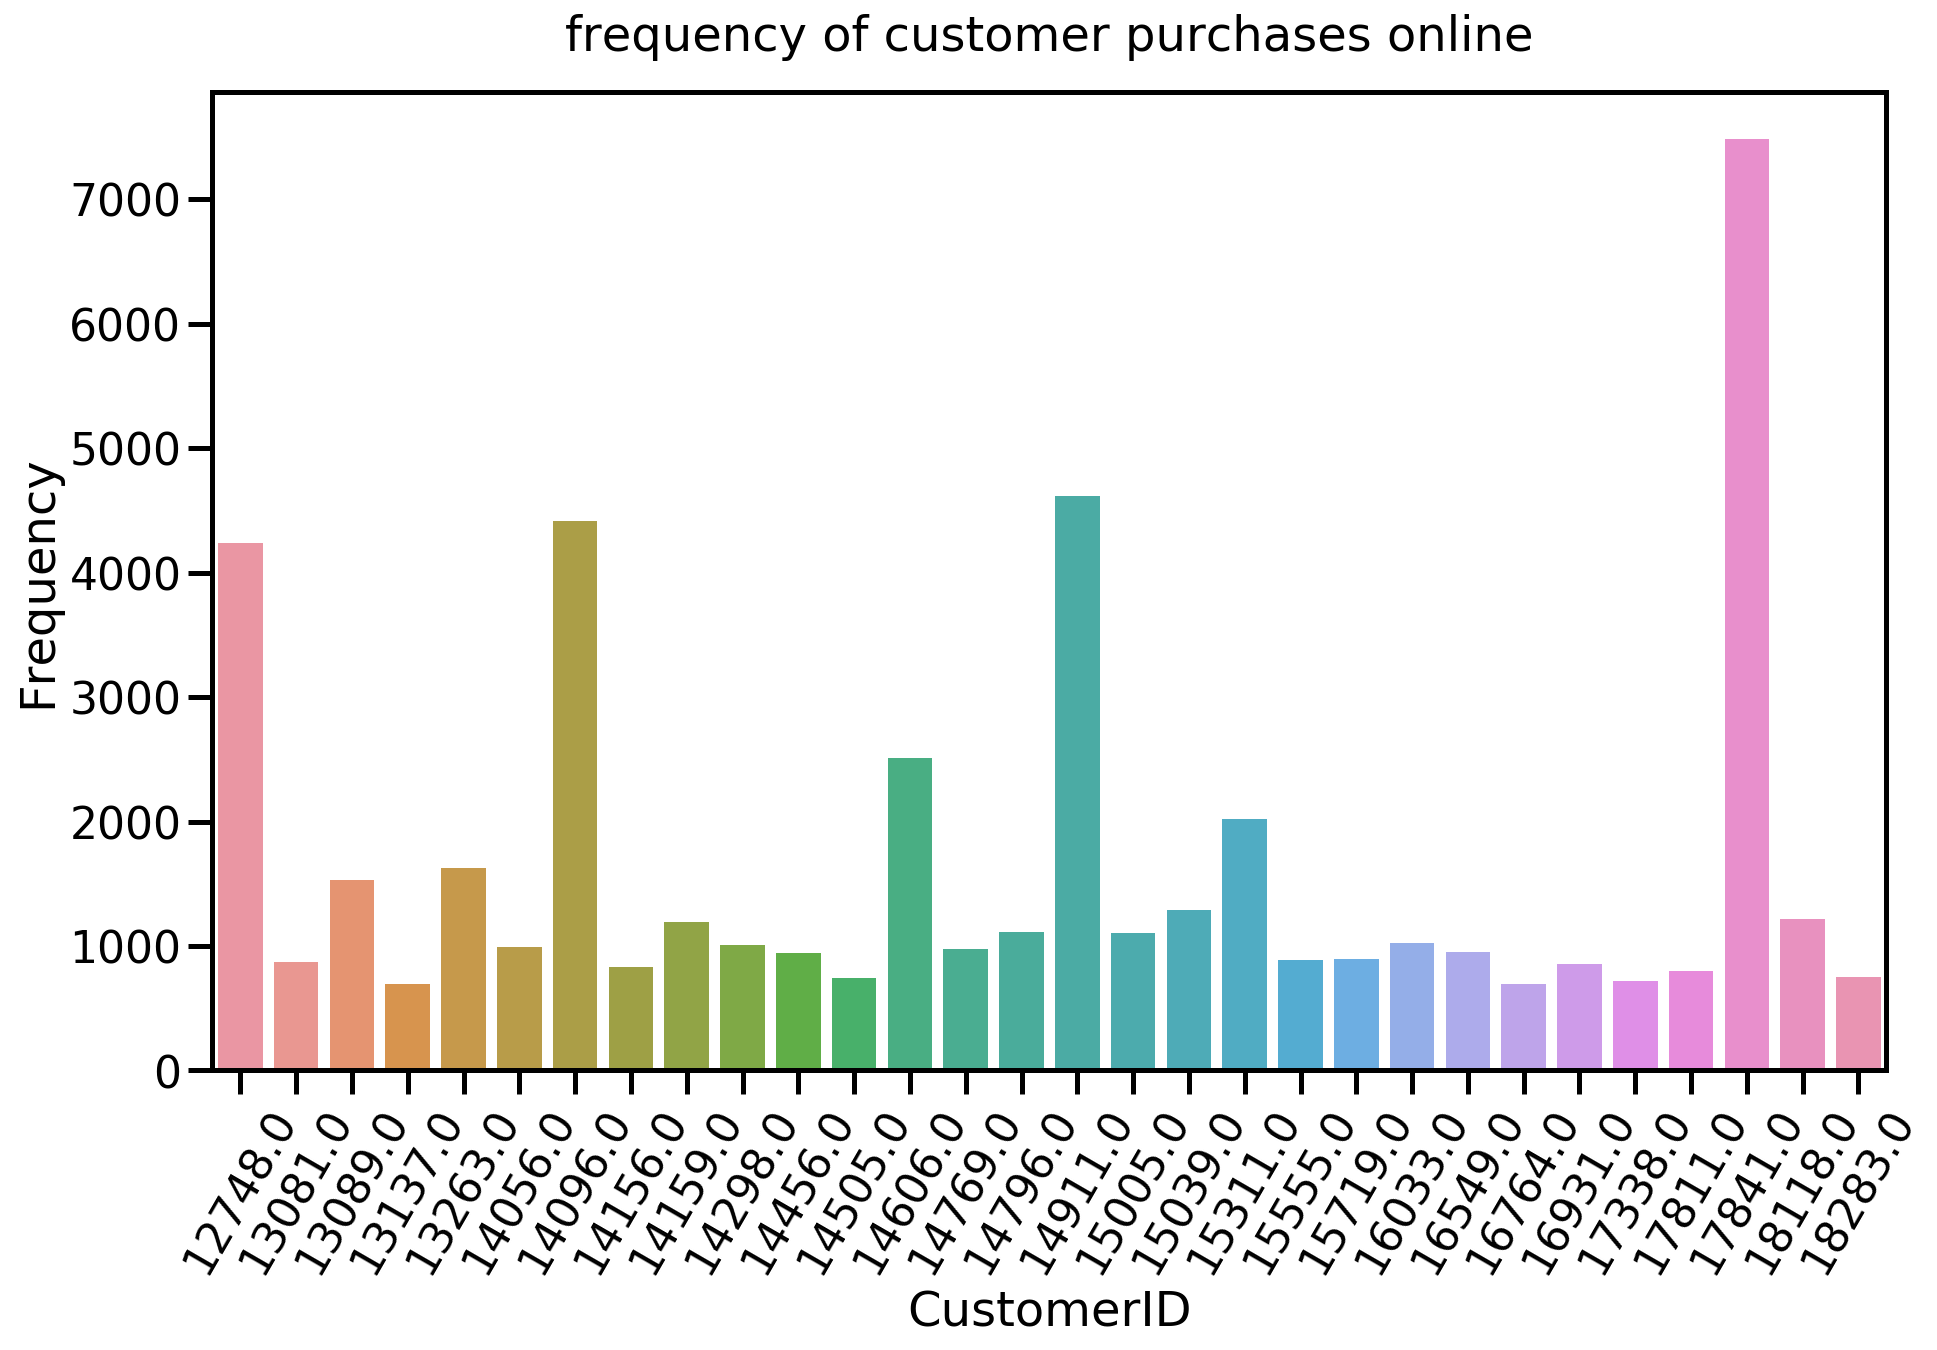

In [26]:
df_plot3 = customer.sort_values('Frequency', ascending=False).head(30)
print(df_plot3)
plt.figure(figsize=(15,9))
sns.set_context('poster')
sns.barplot(x='CustomerID', y='Frequency', data=df_plot3)
plt.xticks(rotation=60)
plt.title('frequency of customer purchases online', y=1.03)

Text(0.5, 1.0, 'relationship between total amount and frequency')

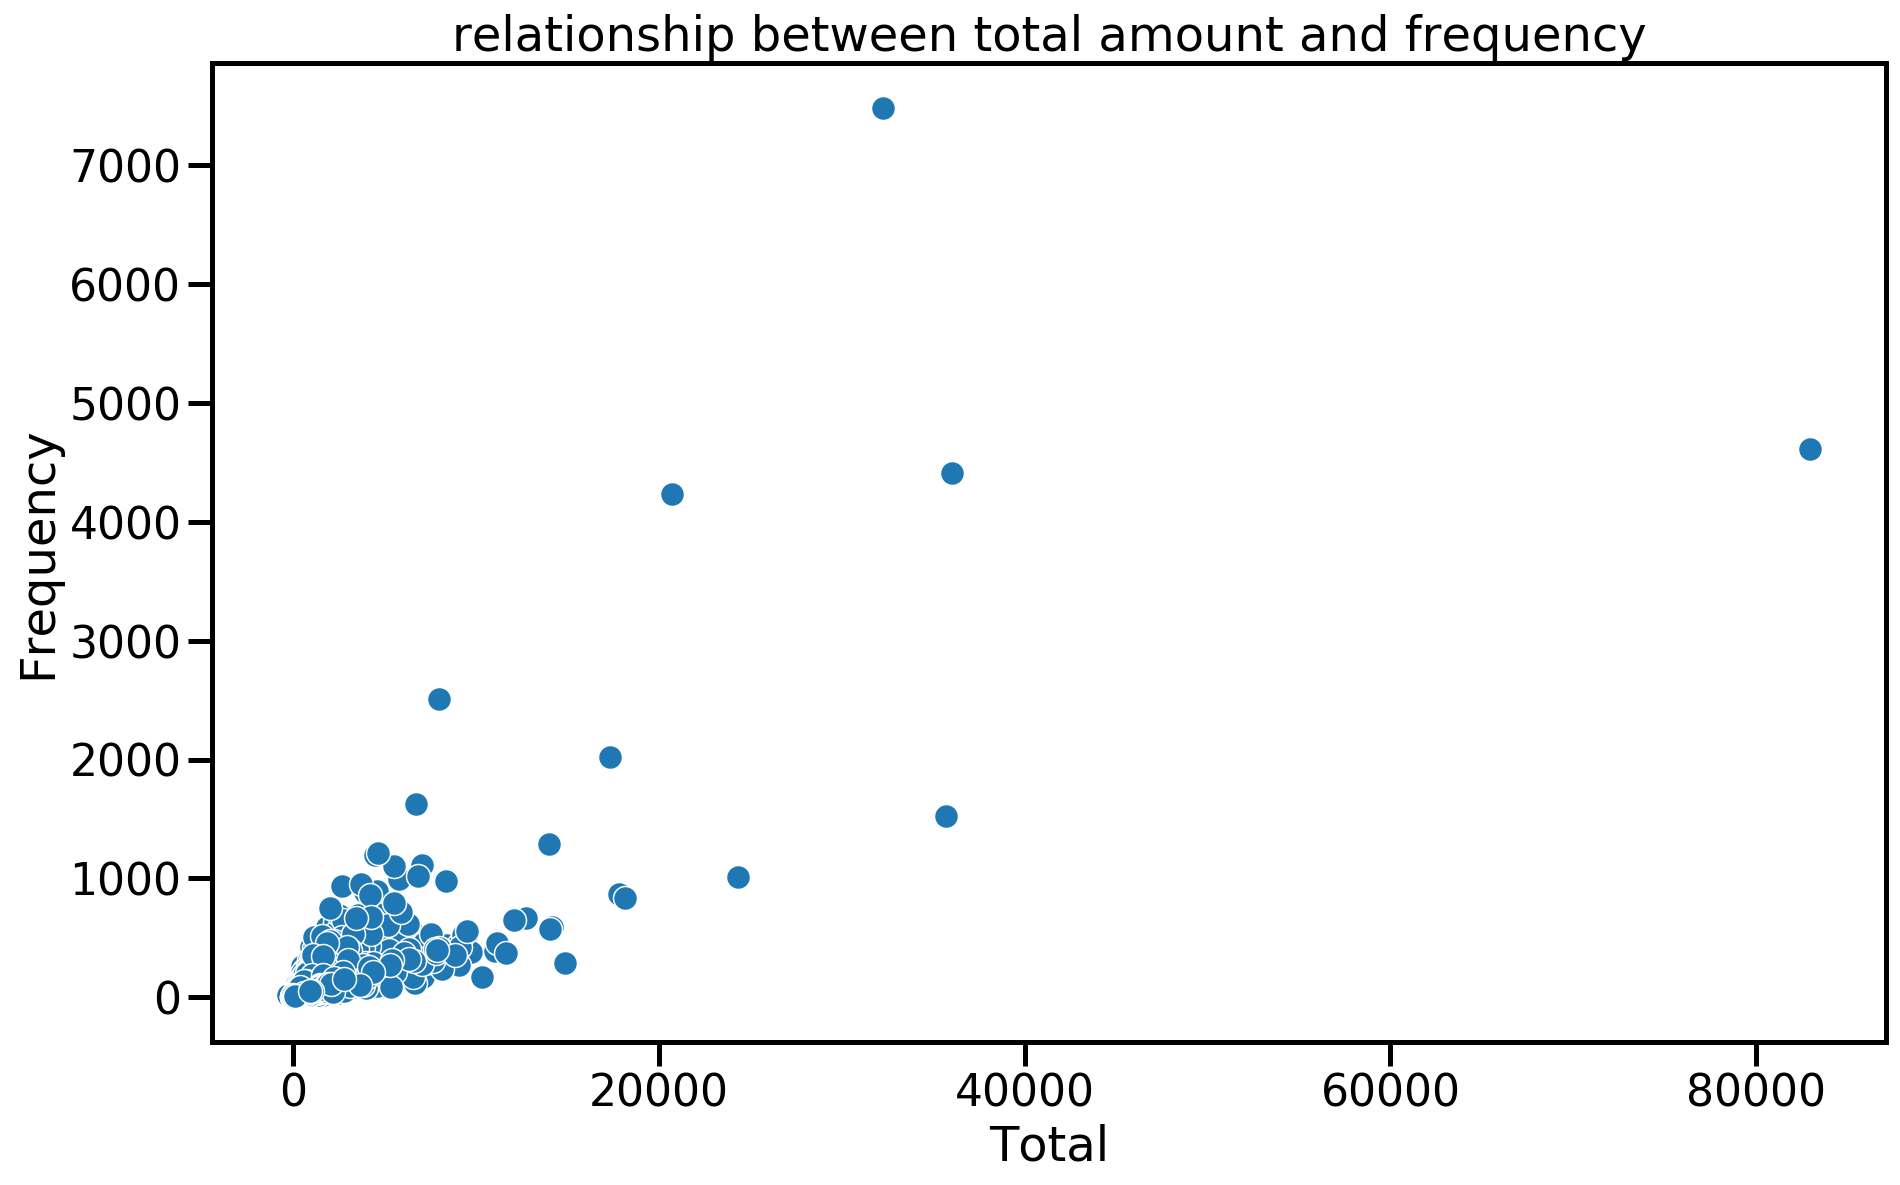

In [27]:
plt.figure(figsize=(15,9))
sns.set_context('poster')
sns.scatterplot(x='Total',y='Frequency',data=customer)
plt.title('relationship between total amount and frequency')

(0, 1000)

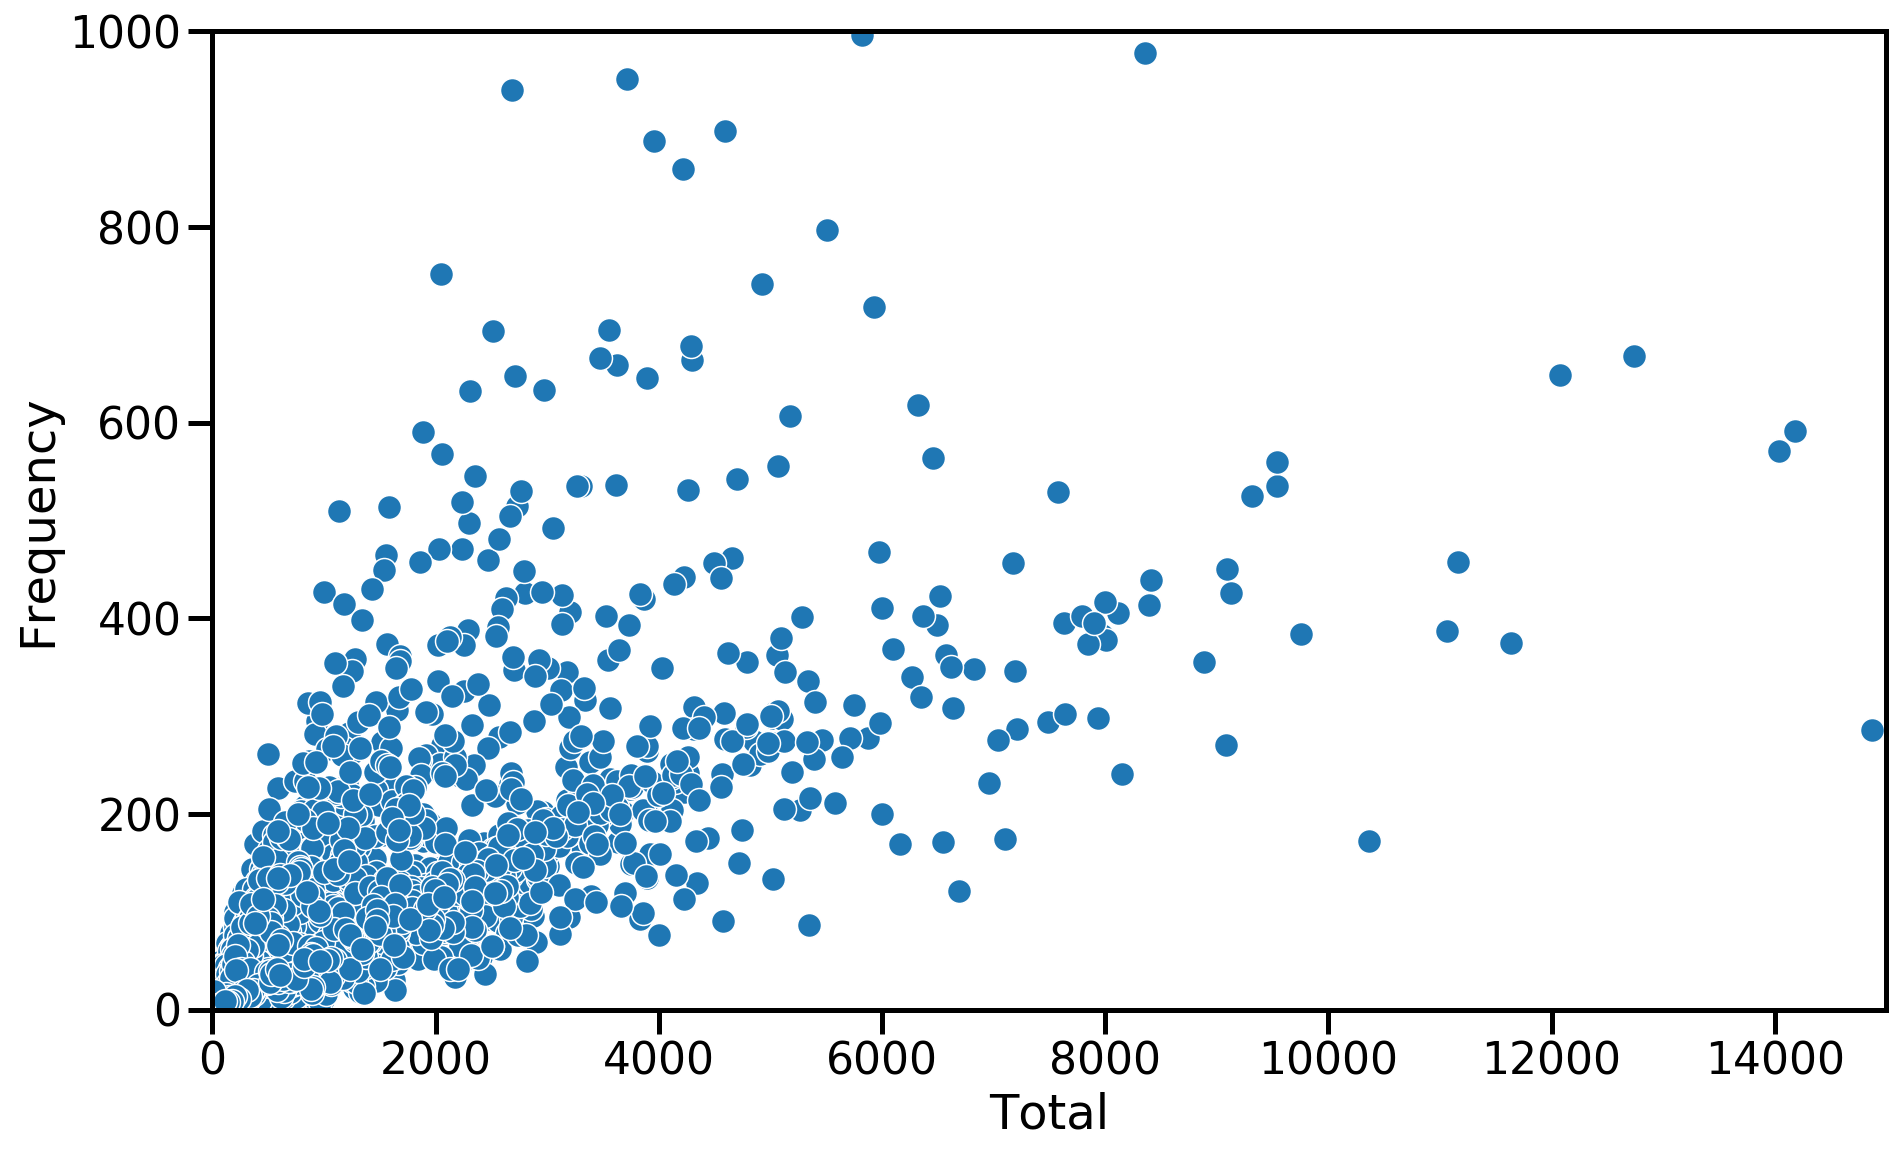

In [28]:
plt.figure(figsize=(15,9))
sns.set_context('poster')
sns.scatterplot(x='Total',y='Frequency',data=customer)
plt.xlim((0,15000))
plt.ylim((0,1000))

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(customer_m)
customer_scaled = scaler.transform(customer_m)
print(customer_scaled)

[[ 1.06655728  0.41058583]
 [-0.4246594  -0.36620253]
 [-0.01124313 -0.11860124]
 ...
 [-0.41472575 -0.35163774]
 [ 0.48258571  3.25557318]
 [-0.02206008 -0.15258573]]


In [44]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
model.fit(customer_scaled)
labels = model.predict(customer_scaled)

(0, 15)

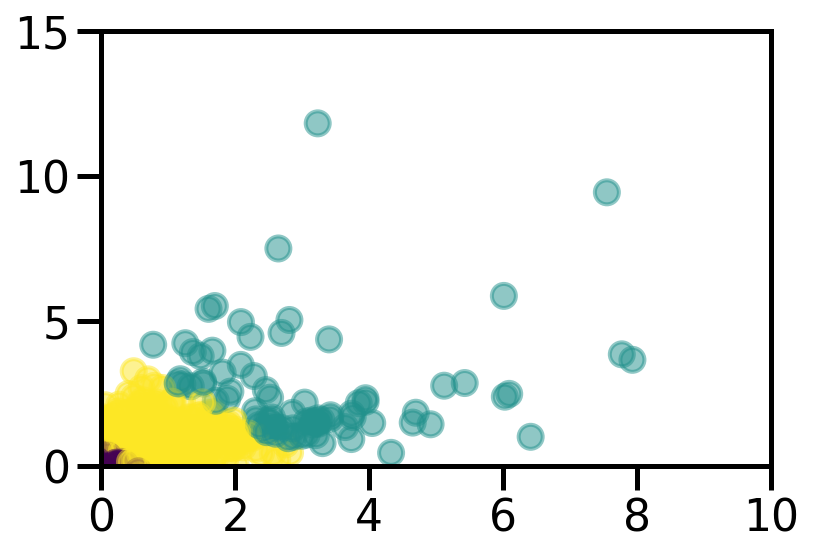

In [50]:
xs = customer_scaled[:,0]
ys = customer_scaled[:,1]
plt.scatter(xs, ys, c=labels, alpha=0.5)
plt.xlim((0, 10))
plt.ylim((0,15))